# 第3章 单变量绘图

这张主要来看当变量只有一个时，我们如何通过绘图来查看该变量的分布情况。

## 3.1 直方图
这里以经典的鸢尾花（iris）数据集为例，展示Seaborn、Proplot以及SciencePlots的直方图。

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import proplot as pplt
import scienceplots

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size']   = 14

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


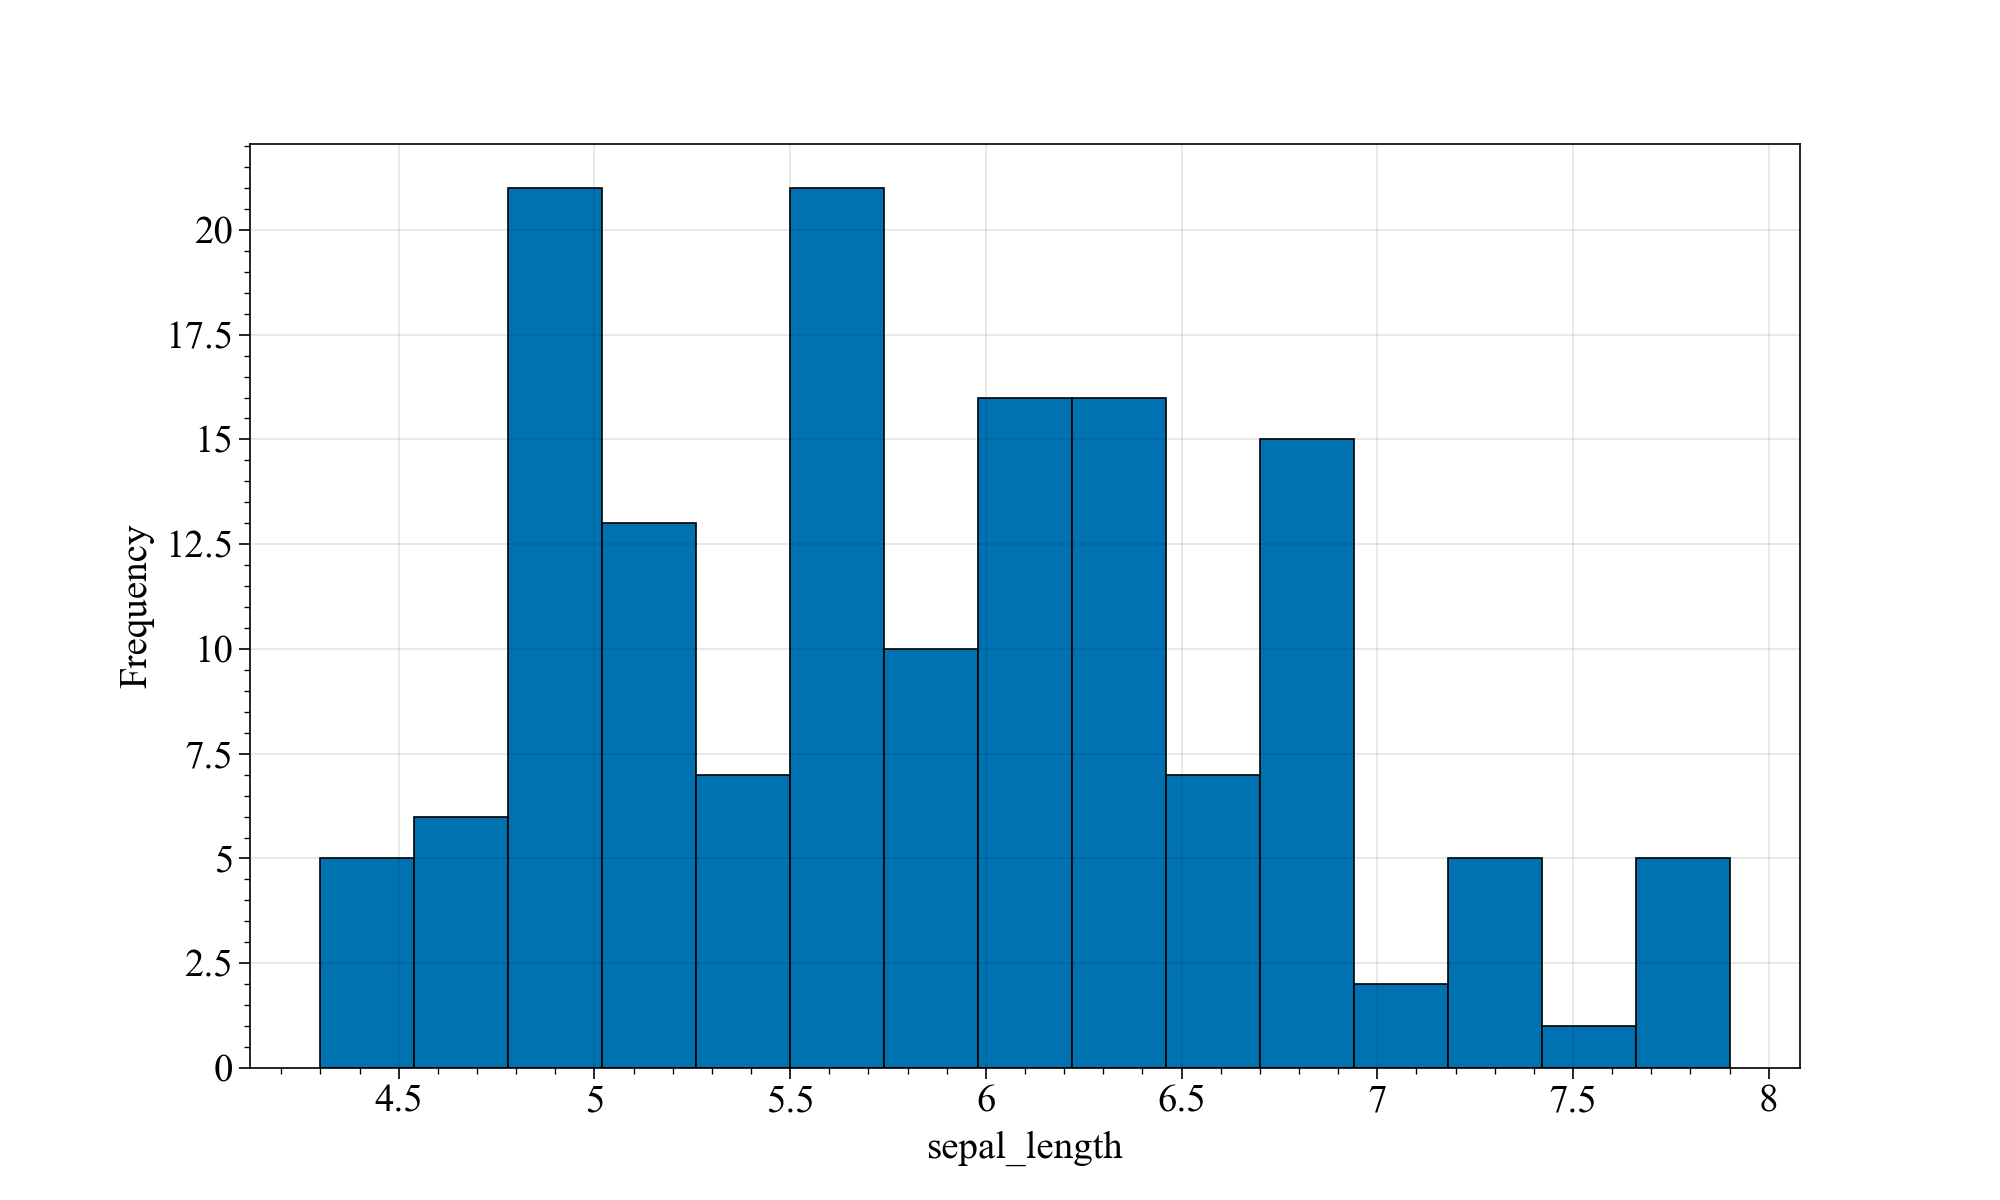

In [3]:
plt.figure(figsize=(10,6), dpi=100, facecolor="w")

plt.hist(iris["sepal_length"], bins=15, edgecolor='black')
plt.xlabel("sepal_length")
plt.ylabel("Frequency")

plt.savefig('./images/Hist_matplotlib.png', dpi=300, bbox_inches='tight')
plt.show()

x轴为鸢尾花的萼片（sepal）长度，y轴为不同萼片长度范围内的鸢尾花的数量。

matplotlib能画个基本的直方图，但不够优雅~ 

接下来我们来试试Seaborn，这个可就有意思多了。

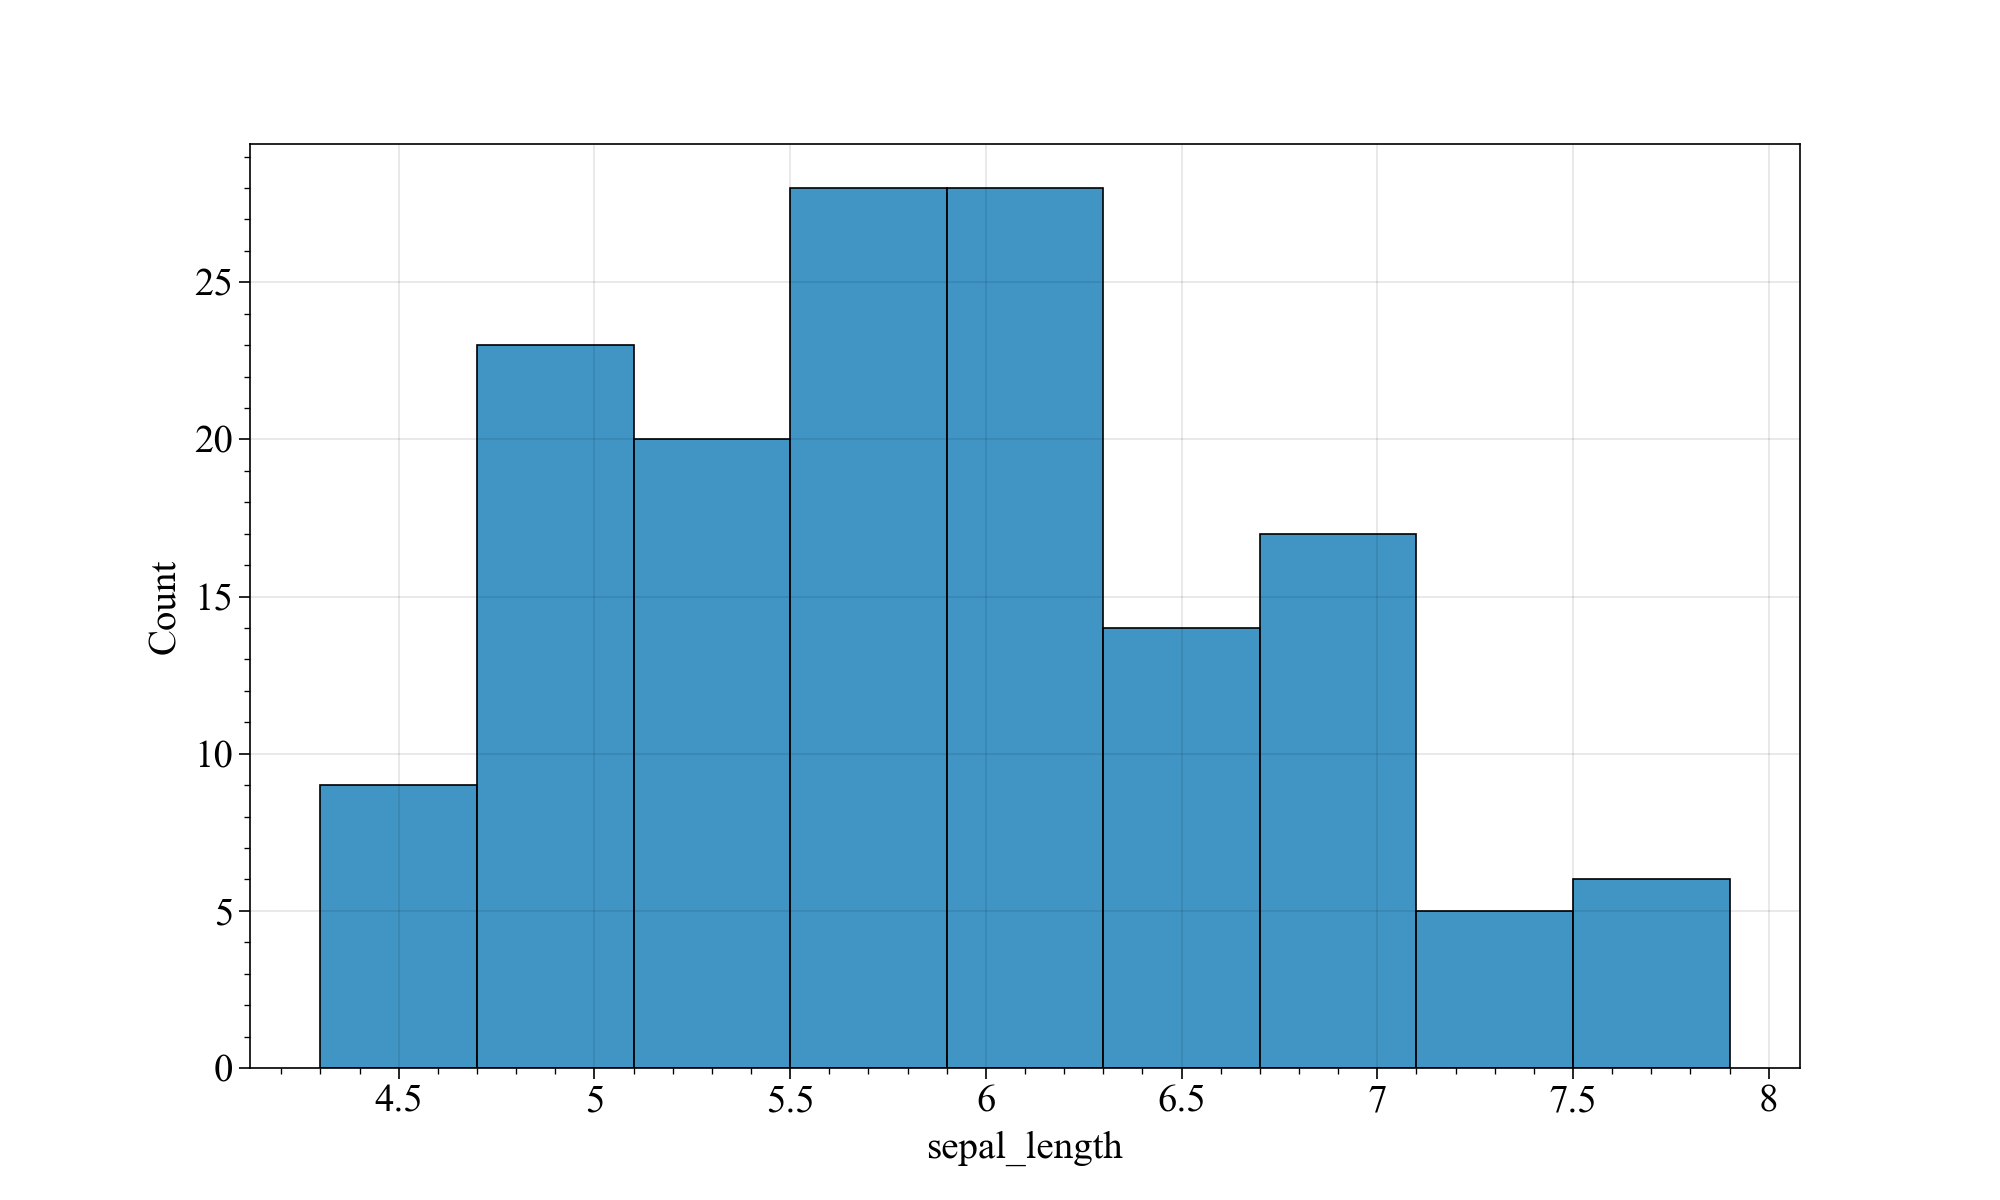

In [5]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=iris, x="sepal_length")

plt.savefig('./images/Hist_seaborn_original.png', dpi=300, bbox_inches='tight')
plt.show()

相当原始，和matplotlib一样，不够优雅。我们给他加点魔法(核密度估计曲线kde)：

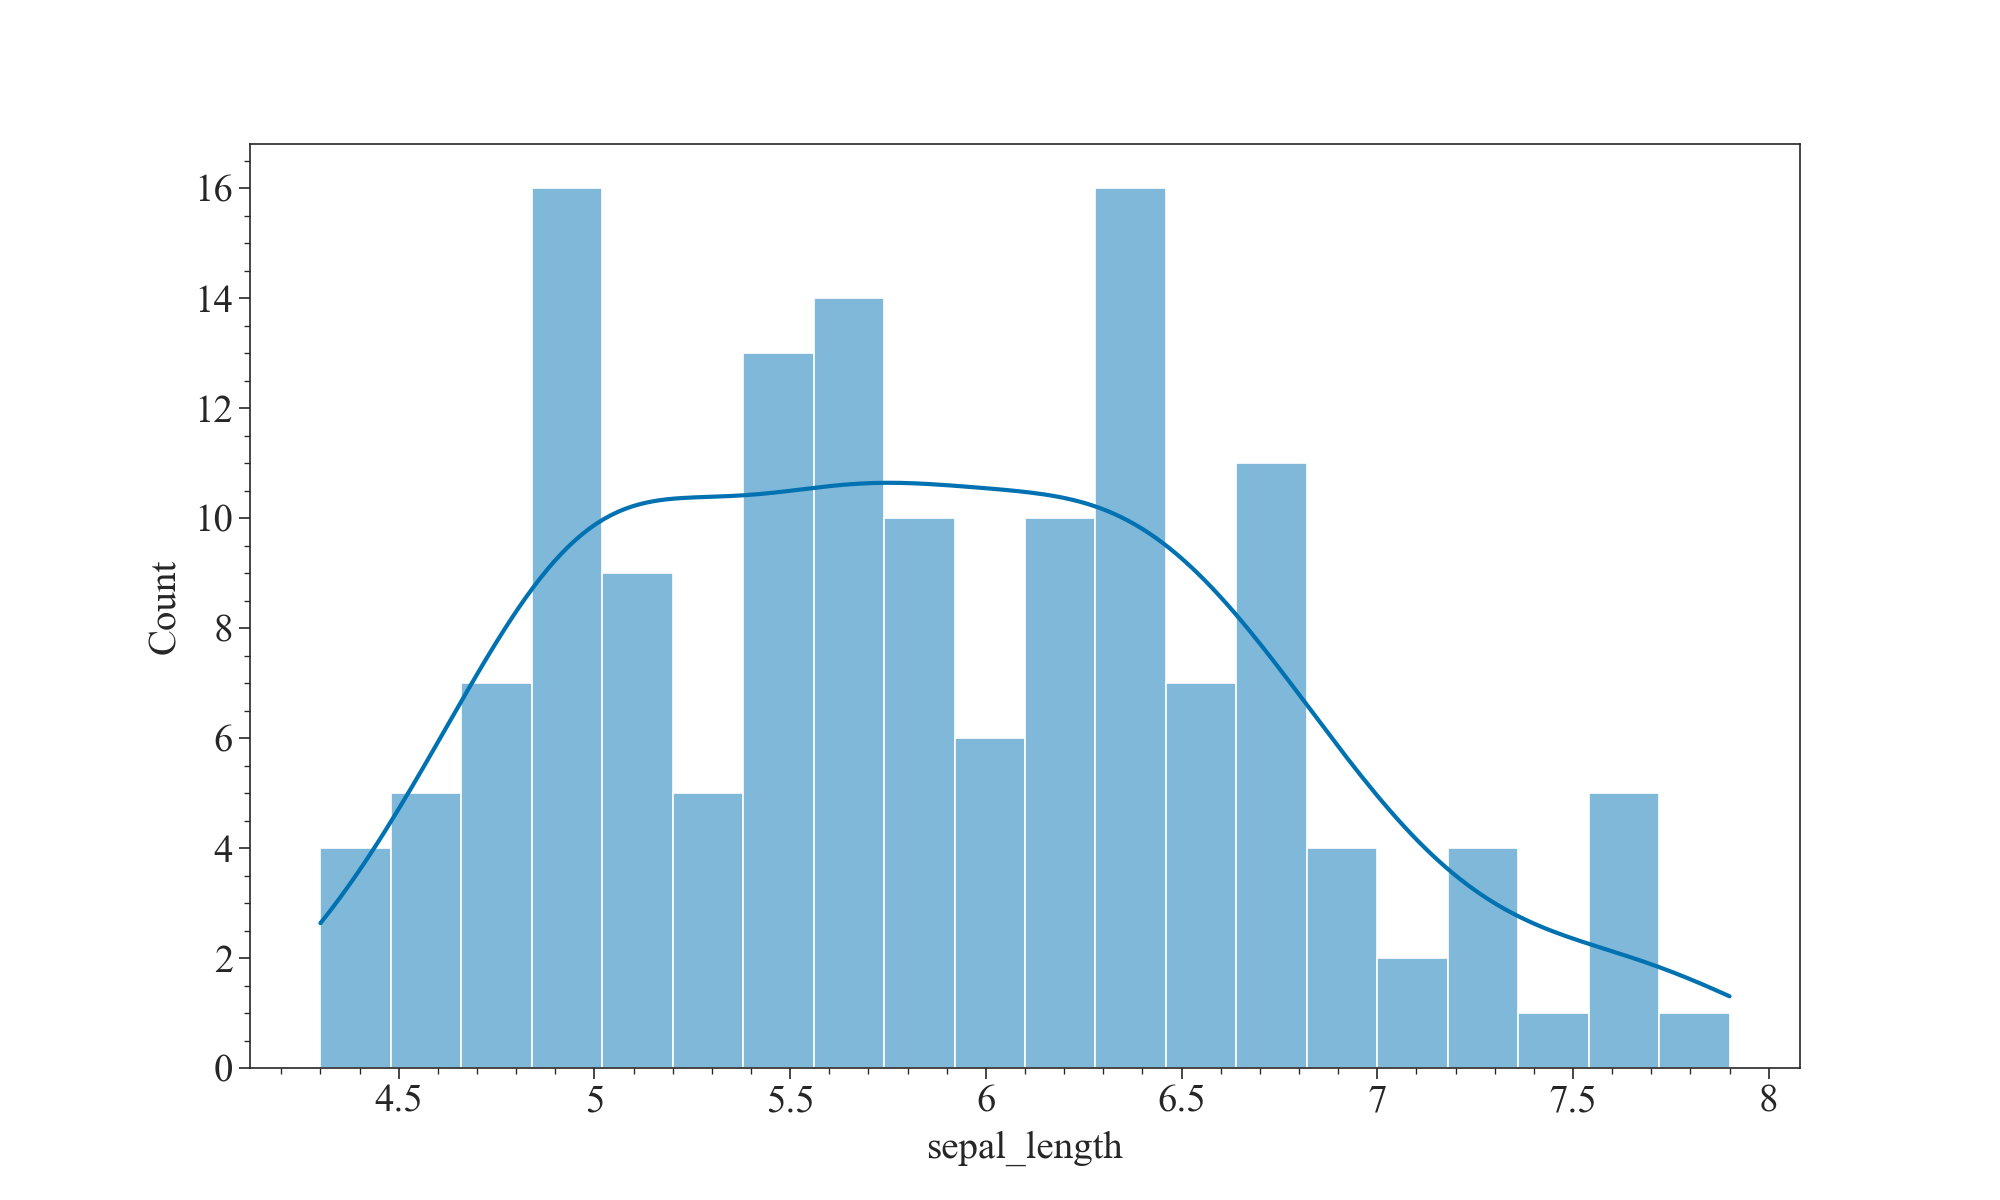

In [15]:
# 设置seaborn风格
custom_params = {"font.family"   : "Times New Roman", "font.scale": 1.5}
sns.set_style(style="ticks", rc=custom_params) #设置绘图风格

plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=iris, x="sepal_length", bins=20, kde=True)

plt.savefig('./images/Hist_seaborn_kde.png', dpi=300, bbox_inches='tight')
plt.show()

还可以分组查看萼片的长度分布情况：

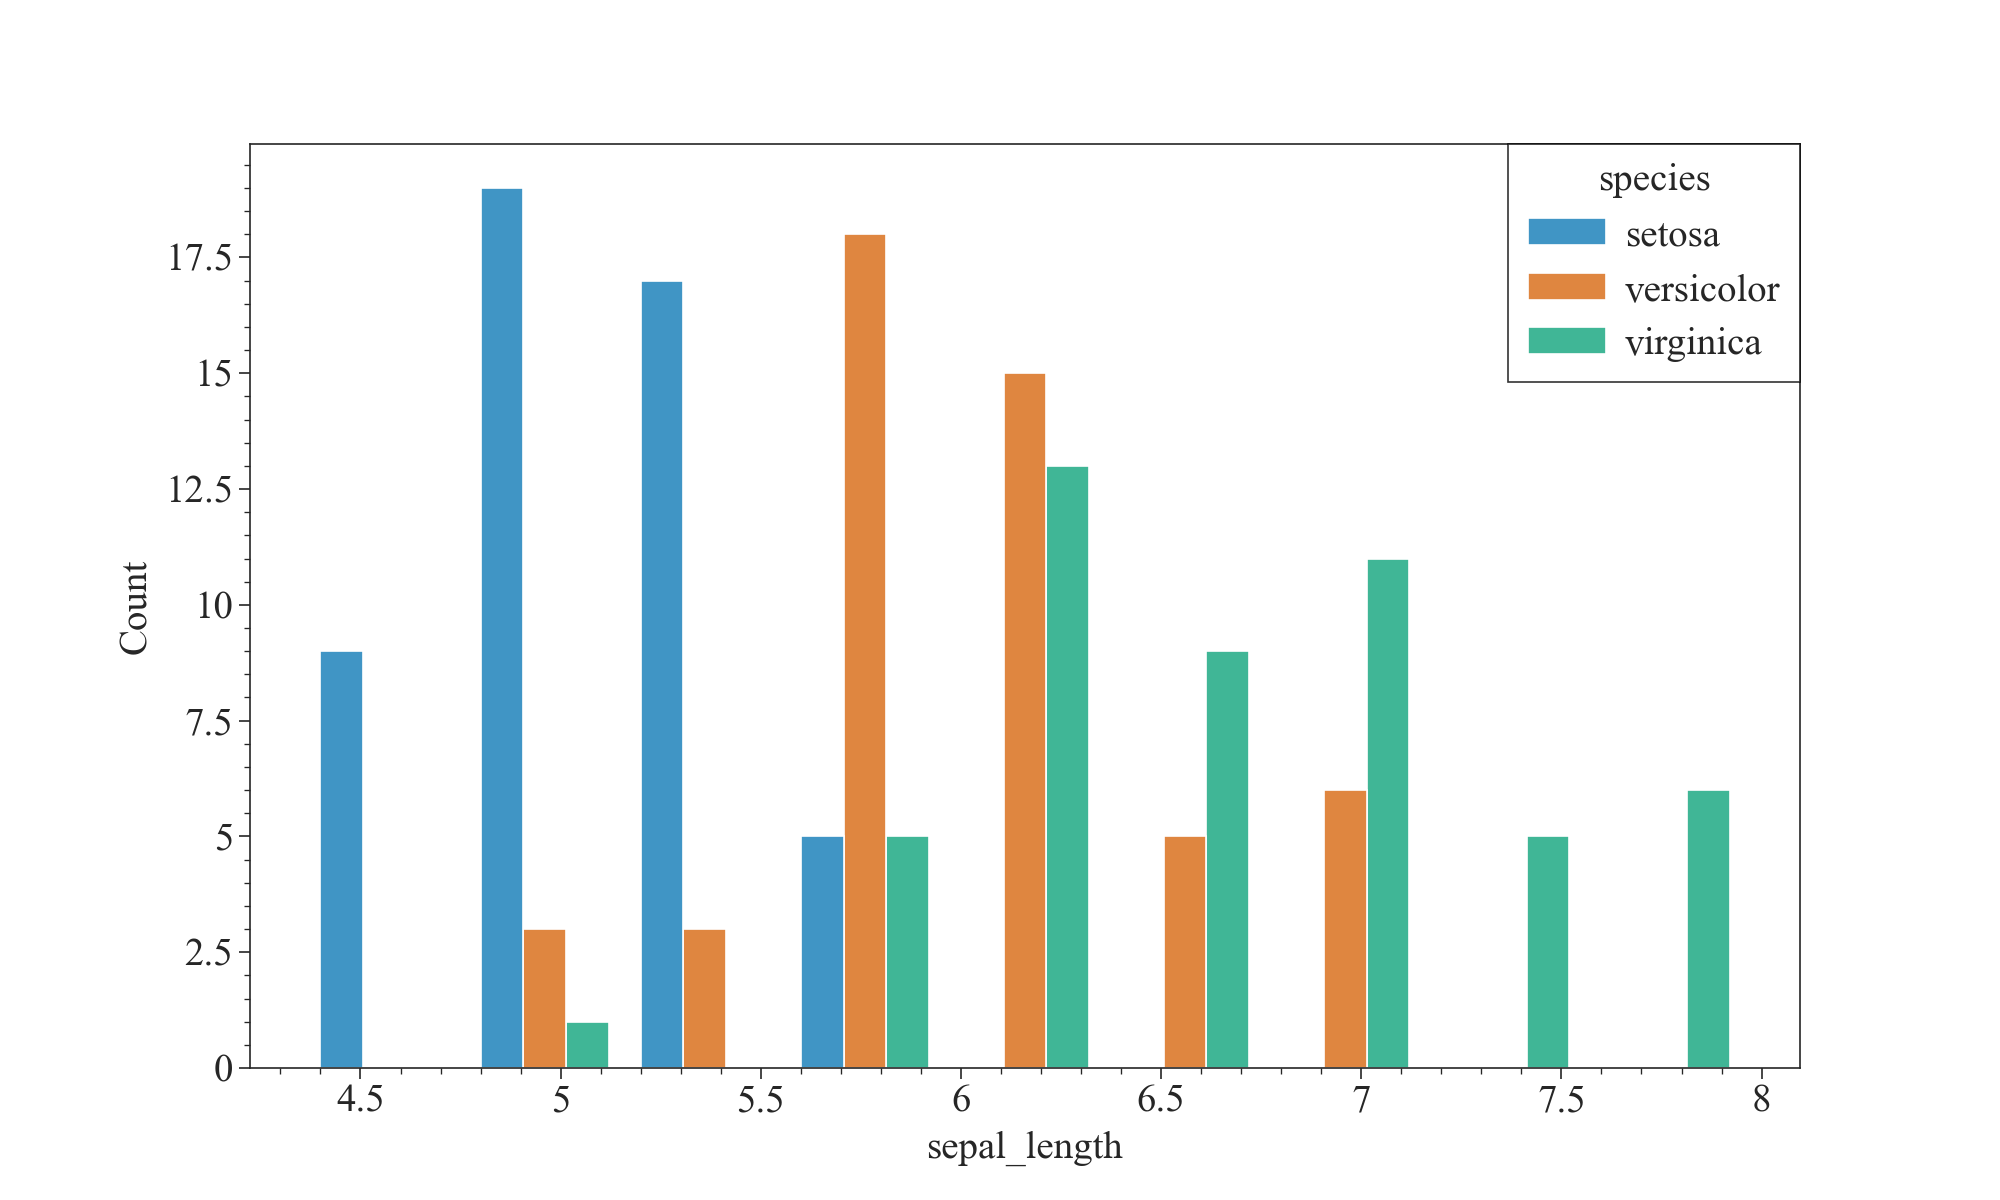

In [36]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=iris, x="sepal_length", hue='species', multiple='dodge', shrink=.8)

plt.savefig('./images/Hist_seaborn_group.png', dpi=300, bbox_inches='tight')
plt.show()

如上图，我们可以发现，山鸢尾花（setosa）的萼片长度比其他两种要短，杂色鸢尾花（Versicolor）的萼片长度适中，维吉尼亚鸢尾花（Virginica）的萼片长度普遍更长。这也是分辨鸢尾花种类的一个重要特征。

咳咳，扯远了，来看看Proplot的直方图：

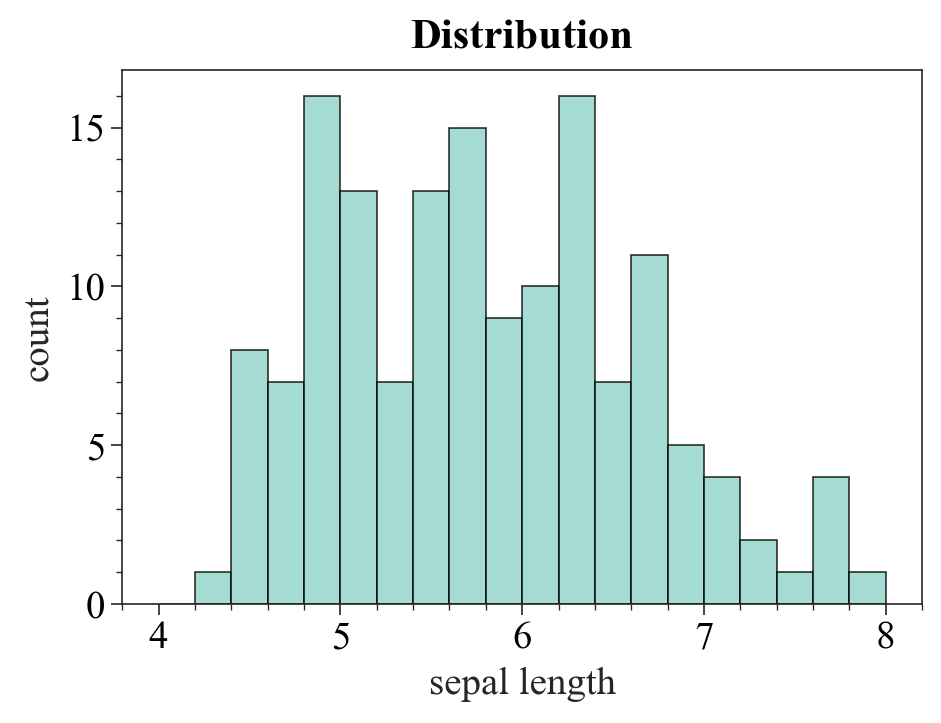

In [35]:
# fig, axs = pplt.subplots(ncols=1)
# axs.format(
#     abc='A.', abcloc='l', titleabove=True,
#     ylabel='sepal_length', suptitle='Histograms of sepal length distributions'
# )
# colors = ('indigo9', 'red9')
color = 'red9'

fig, ax = pplt.subplots(refwidth=4, refaspect=(3, 2))
ax.format(suptitle='Distribution', xlabel='sepal length', ylabel='count')
res = ax.hist(
    iris['sepal_length'], pplt.arange(4, 8, 0.2), filled=True, alpha=0.8, edgecolor='k', 
            histtype='bar', cycle='Set3')

plt.savefig('./images/_histplot_group.png', dpi=300, bbox_inches='tight')
plt.show()

emmmm，挺素的，下一位：SciencePlots

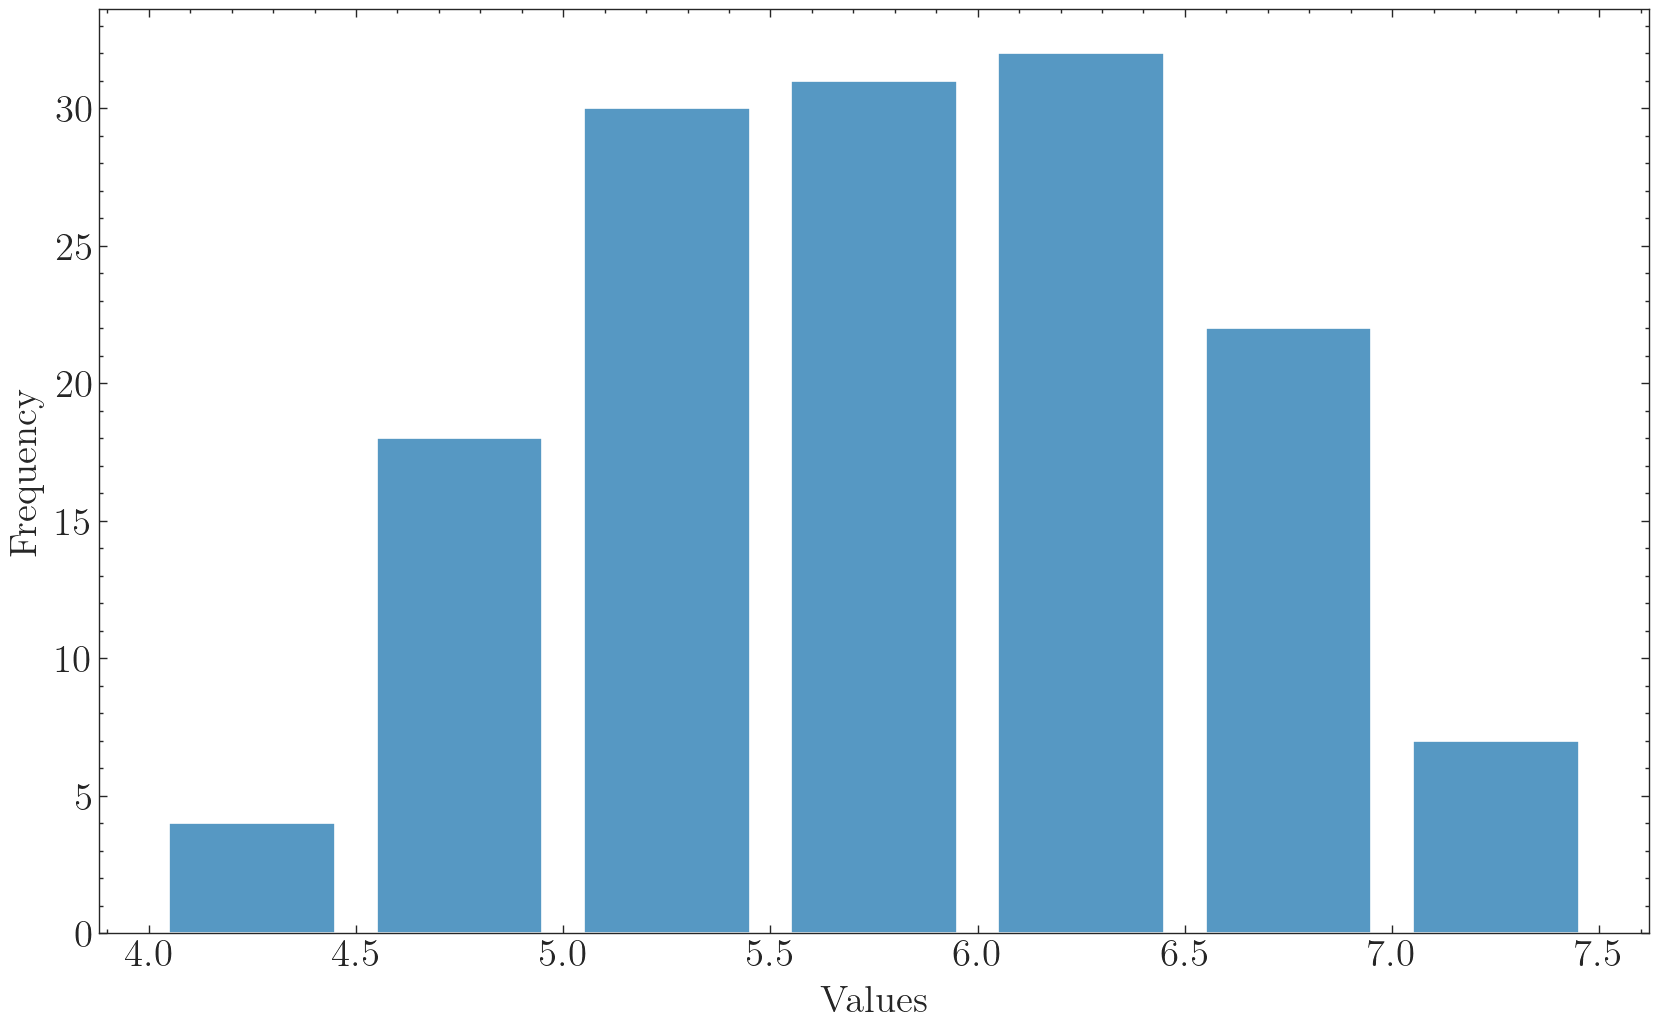

In [53]:
bins = np.arange(4,8,0.5)
with plt.style.context(['science']):
    fig,ax = plt.subplots(figsize=(10,6),dpi=100,facecolor="w")
    hist = ax.hist(x=iris['sepal_length'], bins=bins,color='#5698c3',
                   edgecolor='w',rwidth = 0.8)
    # ax.set_xlim(4, 8)
    # ax.set_ylim(0.0,25)
    ax.set_xlabel('Values', )
    ax.set_ylabel('Frequency')

plt.savefig('./images/Hist_matplotlib_SciencePlots.png', dpi=300, bbox_inches='tight')
plt.show()

不错，很严谨！再来看看Seaborn + SciencePlots的组合：

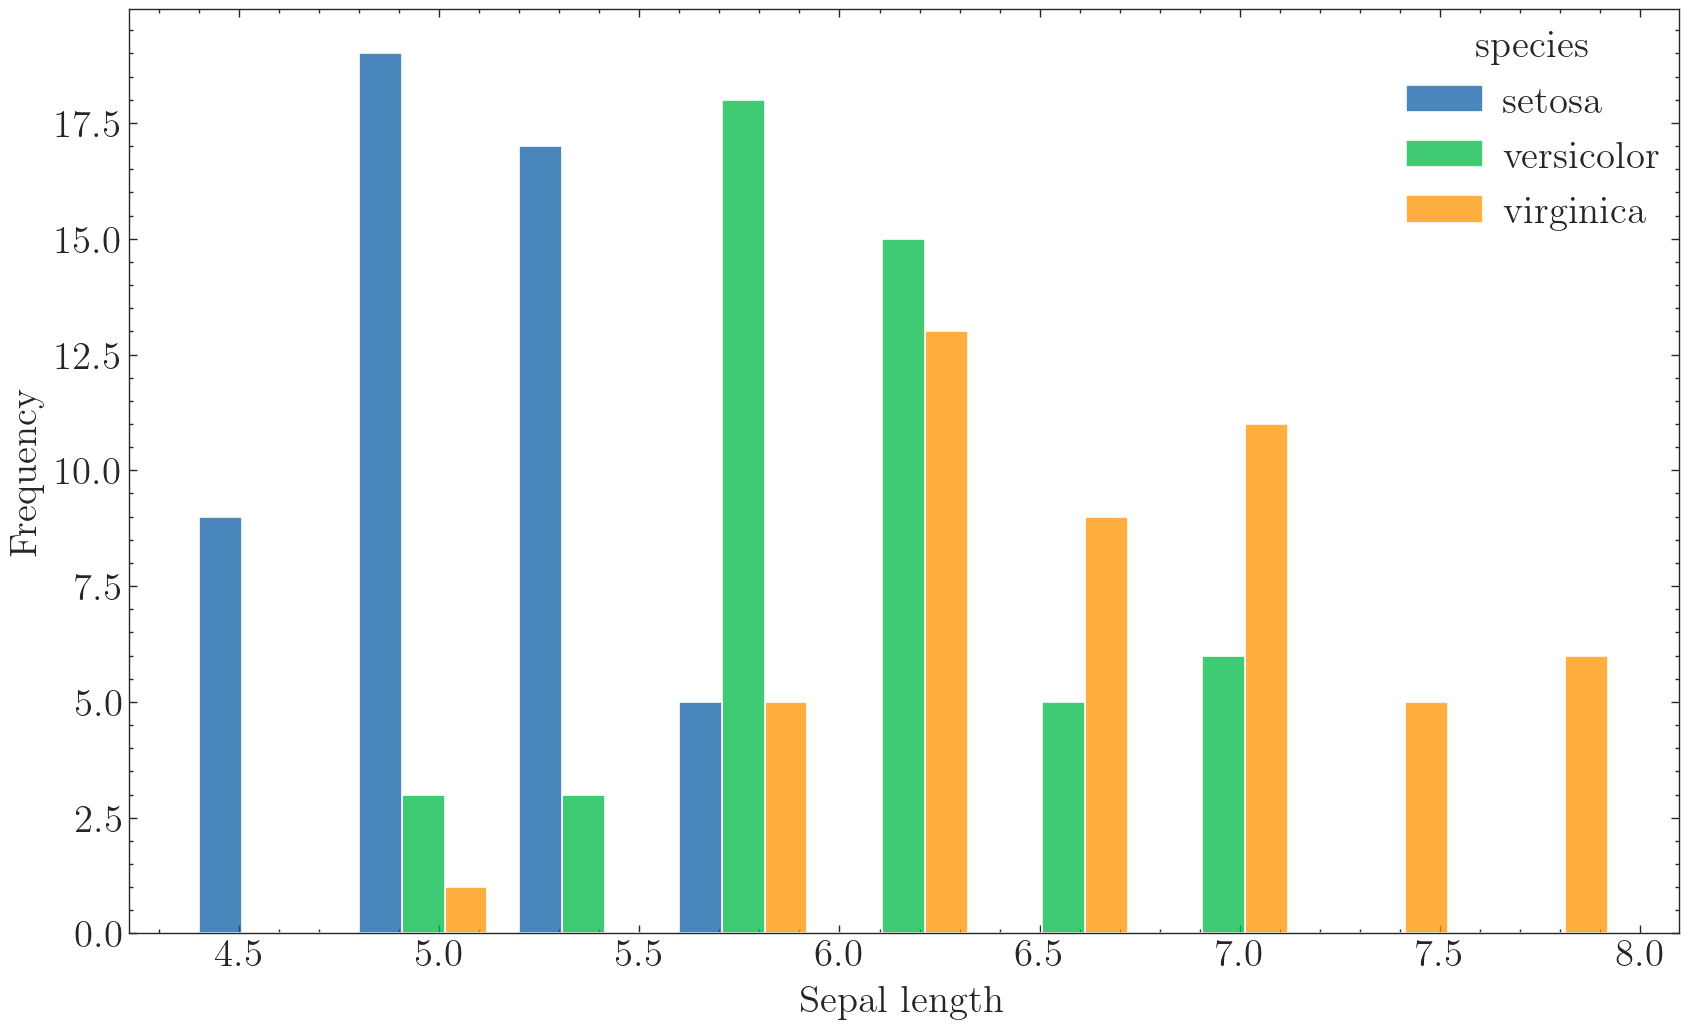

In [54]:
# plt.style.use('science')
with plt.style.context(['science']):
    fig, ax = plt.subplots(figsize=(10,6),dpi=100,facecolor="w")
    sns.histplot(data=iris, x="sepal_length", hue='species', multiple='dodge', shrink=.8)
    ax.set(xlabel='Sepal length', ylabel='Frequency')     
    ax.set_xlim(4, 8)
    ax.set_ylim(0, 30)        
    ax.autoscale(tight=False)   

    plt.savefig('./images/Hist_seaborn_SciencePlots1.png', dpi=300, bbox_inches='tight')
    plt.show()

也挺好看的，但是要注意，`SciencePlots`在这里似乎必须得和`plt.subplots()`配合使用，不然容易报错。

<Figure size 1000x600 with 0 Axes>

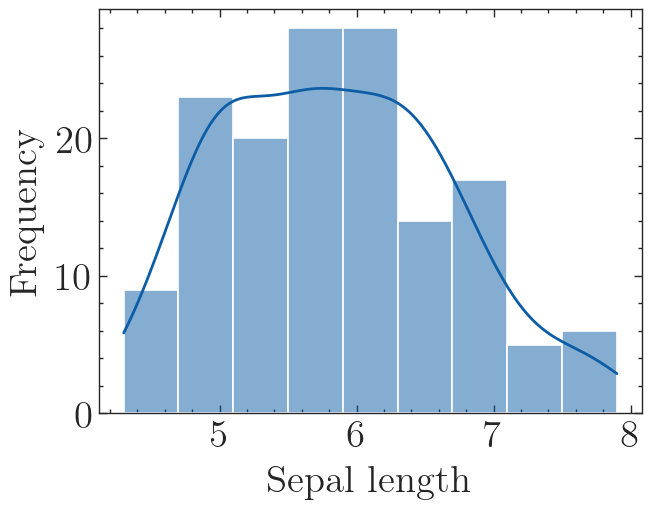

In [56]:
plt.style.use('science')

# with plt.style.context(['science']):
plt.figure(figsize=(10, 6), dpi=100)
fig, ax = plt.subplots()        
sns.histplot(data=iris, x="sepal_length", kde=True)        
ax.set(xlabel='Sepal length', ylabel='Frequency')     
ax.set_xlim(4, 8)
ax.set_ylim(0, 30)        
ax.autoscale(tight=False)     

plt.savefig('./images/Hist_seaborn_SciencePlots2.png', dpi=300, bbox_inches='tight')
plt.show()

参考资料：<br>
[1] [《Datawhale 科研论文配图绘制指南--基于Python》](https://github.com/datawhalechina/paper-chart-tutorial)<br>
[2] [matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>
[3] [Seaborn 官方文档](https://seaborn.pydata.org/) <br>